# Linear Regression with Gradient Descent
In this notebook I will go over the basics of linear regression using gradient descent. To demonstrate this I will fit a line to some linear data. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration and the Issue.
First we will take a look at our data. We can see that its x and y values. We can also graph and see thats its linear data. In the graph below I also have an example of what linear regression with gradient descent attempts to solve which is how can we best represent some linear data. As you can see we have our data is in blue and there are also two lines as well representing models. The red line is very far away and therefor does not represent the data well at all really. However the green line is closer to the data and fits better to it as well making it a better model but not quite the best. With gradient descent we can use machine learning to find the best line/model to represent the data.  

In [2]:
data = pd.read_csv('data.csv')
data.head()

,x,y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [3]:
# select x and y column
X = data.x 
Y = data.y

Below here we have a look at our data. The blue points is the data which we want to represent with some model. We represent the data with some model by finding the line of best fit for our data. The line of best fit is the line that best expresses a relationship between all the poitnts. As we can see the red line (bad model) below does not represent our data well. We know this because its very far from any of our data. There is also the green line (better model). This line seems to represent our data a lot better but we can still do better than this. In the sections below I will go over how we can learn which parameters (m, b) will give us the best line (model) for our data.

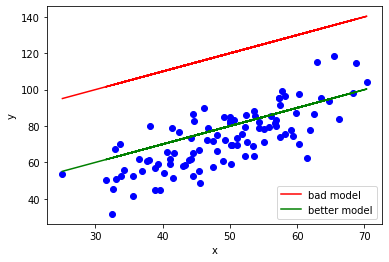

In [4]:
plt.scatter(X, Y, color='b')
plt.plot(X, (1*X)+70, '-', color='red') # random bad parameters
plt.plot(X, (1*X)+30, '-', color='green') # random better parameters
plt.legend(["bad model", "better model"], loc ="lower right")
plt.xlabel('x')
plt.ylabel('y')
plt.show();

# Preforming Gradient Descent
Now that we understand what we are actually trying to achieve we can now get into how to actaully do it. As I mentioned earlier we want to learn which parameters will fit our model best. So our current model is $m*x+b$. Here $x$ represents our data. $m$ represents our slope, and $b$ represents our y intercept. One way of trying to learn which parameters will be good for our data is by randomly setting values for $m$ and $b$. This of course is not a good method because it will take a while to manauly change the values of our model. So this is why we do gradient descent. In calculus the gradient tells .... So what we are going to do is take the negative gradient. But what exactly are we taking the gradient of and why? Since we want to minimize the cost (make the error small) of our model we are going to be taking the gradient of our cost function. And we are doing this to see which $m$ and $b$ values give us the smallest error. So we will be taking the derivative of our cost function with respect to $m$ and $b$. In other words how much does $m$ and $b$ affect our cost. Our cost function in this is going to be this: 
$$ sse = \sum_{i=1}^n (\hat{y}-y)^2 $$

This might look confusing to some but I'll break it down. $\hat{y}$ represents the prediction of our model. $y$ represents the actual value. So what we are doing in subtracting our prediction $\hat{y}$ by the actual value $\hat{y}$ and squaring that differnce. The $\sum_{} $ means we are doing it for all of our data points (from 1 to n where n is the length of our data). Now we can start taking the gradient. The gradient is the vector of partial deritavites and as I mentioned we are taking the partial derivatives of our cost function with respect $m$ and $b$. 

First lets start by breaking down our cost function. Since we know our $\hat{y}$ is our prediction, then we can say:

$$ \hat{y} = m*x+b $$
So our cost function now looks like:

$$ ((m*x+b)-y)^2$$.

Now that we see where our $m$ and $b$ are coming from in our cost function we can take derivatives. When we take partial derivatives every variable thats not the one we care for is treated as constant. First lets take the partial derivative of the cost function $sse$ with respect to $m$.

$$\frac{dsse}{dm} = 2(mx+b - y)\frac{dsse}{dm}(mx+b-y) = 2(mx+b -y)*x = 2(y'-y)x$$
This is the derivative of our cost function with respect to the $m$.
$$\frac{dsse}{dm} = 2(y'-y)x$$
Now lets continue and take the partial derivative of our cost function with respect to $b$.
$$\frac{dsse}{dm} = 2(mx+b - y)\frac{dsse}{db}(mx+b-y) = 2(mx+b -y)(1) = 2(y'-y)$$
So the derivative of our cost function with respect to the $b$.
$$\frac{dsse}{db} = 2(y'-y)$$

These functions below :
$$ b += -(2(y'-y)x) \hspace{10mm} m += -(2(y'-y))$$
Will tell us in which direction we must move our $m$ and $b$ variables to. Should we increase or decrease these values to fit our data. Now we will actually do some code to peform gradient descent.

In [5]:
def gradient_descent(X, y, learning_rate=0.000001, epochs=1000):
    """
    This function will preform gradient descent
    """
    m = 0
    b = 0
    for i in range(epochs):
        y_pred = (m*X) + b
        derivative_m = 2 * sum((y_pred-y)*X)
        derivative_b = 2 * sum(y_pred-y)
        m += - learning_rate * derivative_m
        b += - learning_rate * derivative_b
    return m, b

In [6]:
m, b = gradient_descent(X, Y)

Below is a graph that shows our data and the line (model) given by performing gradient descent. As we can see the line is a lot more centered to the entired data meaning the error is much lower.

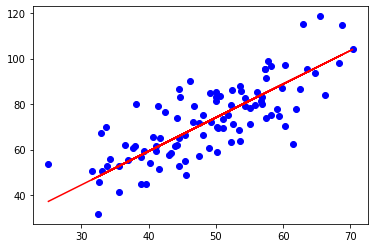

In [13]:
plt.scatter(X, Y, color='b')
plt.plot(X, (m*X)+b, '-', color='red')
plt.show()

# Understanding Gradient Descent Visually
As we leanred earlier gradient descent is a way to in which we can optimize. Below I have some code that will visualy show us what it is that is happening when we perform gradient descent.

In [7]:
def sse(X, y, m):
    """Function to get the error of our model with our current coefficient.
    
    Parameters:
    __________
    X : data
        The x values in our data
    y : data
        The y values in our data
    m : int
        The current coefficient for the model
    
    Returns:
    _______
    
    
    """
    y_pred = [((m * x)) for x in X]
    return sum((y_pred - y)**2)

In [8]:
def get_error_by_coefficient(x, y):
    coefficient_errors = []
    for i in range(-4, 6):
        coef_m = i
        error = sse(x, y, coef_m)
        coefficient_errors.append([coef_m, error])
    errors = pd.DataFrame(coefficient_errors, columns=["Coef", "Error"])
    return errors

In [9]:
errors = get_error_by_coefficient(X, Y)

In [10]:
errors.head()

,Coef,Error
0,-4,7.490330e+06
1,-3,5.009587e+06
2,-2,3.027036e+06
3,-1,1.542677e+06
4,0,5.565108e+05


Here is the graph. 

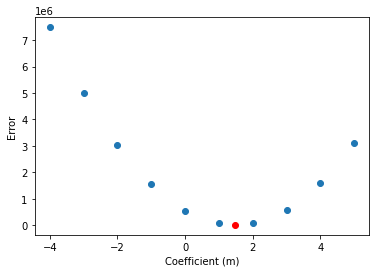

In [11]:
plt.xlabel("Coefficient (m)")
plt.ylabel("Error")
plt.plot(m, sse(X, Y, m), "ro") # our best coefficent and its error
plt.scatter(errors["Coef"], errors["Error"]) # other coeficents and their errors